## Задача 1. `NumPy` и `CuPy`

Използвайки функциите на numpy и cupy за създаване на матрици със случайни числа с големини `1500х1500` покажете, че са верни равенствата:

- $(AB)^{-1} = B^{-1}A^{-1}$

- $(A^T)^{-1}=(A^{-1})^T$

- $(\alpha A)^{-1}=(1/\alpha)A^{-1}$,

където $A$ и $B$ са матрици, а $\alpha$ е реално число.

- $(AB)^{-1} = B^{-1}A^{-1}$

In [123]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns    
import statsmodels.api as sm 
import numpy as geek
import sympy as sp
from numpy.linalg import eig

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from statsmodels.tsa.stattools import acf
from statsmodels.stats.stattools import durbin_watson
from statsmodels.stats.outliers_influence import variance_inflation_factor  
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, mean_squared_error, mean_absolute_error
from scipy.stats import pearsonr, spearmanr

In [2]:
A = np.random.rand(1500,1500)
B = np.random.rand(1500,1500)

In [3]:
A

array([[0.99557609, 0.52973638, 0.72699828, ..., 0.96983197, 0.69556643,
        0.35755173],
       [0.1358384 , 0.7703011 , 0.88407559, ..., 0.64894193, 0.58936171,
        0.67798155],
       [0.63753677, 0.76125394, 0.87636282, ..., 0.85825301, 0.81303857,
        0.39579431],
       ...,
       [0.4549403 , 0.86760075, 0.52623332, ..., 0.79900665, 0.21042861,
        0.52296789],
       [0.93089557, 0.03607116, 0.26143198, ..., 0.45742179, 0.0215099 ,
        0.06891209],
       [0.05170997, 0.72159236, 0.45902535, ..., 0.35876861, 0.63755787,
        0.13392172]])

In [4]:
B

array([[0.23227324, 0.68246889, 0.662564  , ..., 0.18708686, 0.96739823,
        0.96979275],
       [0.06723152, 0.52648324, 0.46140765, ..., 0.75956283, 0.13176973,
        0.81455005],
       [0.28402932, 0.37009335, 0.37054499, ..., 0.9646665 , 0.65950999,
        0.69670206],
       ...,
       [0.84199977, 0.46785085, 0.0124918 , ..., 0.49785098, 0.78295616,
        0.13319195],
       [0.4137875 , 0.0716378 , 0.72964351, ..., 0.69930049, 0.14498911,
        0.60043073],
       [0.01665204, 0.83922945, 0.93174172, ..., 0.03544422, 0.7235679 ,
        0.75162189]])

In [5]:
AB = np.dot(A,B)
AB

array([[377.2509687 , 384.51727344, 374.95367458, ..., 393.51951885,
        385.3543175 , 380.57361518],
       [369.63044053, 365.68694751, 374.07741596, ..., 384.4164126 ,
        369.47076319, 369.13347334],
       [368.16422962, 378.5706914 , 372.20688036, ..., 386.52992871,
        368.69966329, 372.01337018],
       ...,
       [364.61728582, 370.32043058, 365.7471866 , ..., 386.73755374,
        373.703016  , 364.9104018 ],
       [368.50955355, 376.01033697, 376.14313145, ..., 389.16177344,
        377.37479413, 376.10026964],
       [365.66209795, 365.45548571, 375.88246569, ..., 377.36116754,
        373.03057278, 372.58680652]])

In [8]:
inverseAB = np.linalg.inv(AB)
inverseAB

array([[-0.15686435,  0.23146292,  0.03741357, ...,  0.3602301 ,
         0.09735325,  0.10079601],
       [-0.02026861,  0.04972315,  0.13045798, ..., -0.15994103,
        -0.18133894,  0.03264485],
       [-0.07553563,  0.21558445, -0.16389436, ...,  0.33688218,
         0.26747924,  0.17083708],
       ...,
       [-0.25877947,  0.59229152, -0.06188413, ...,  1.09718809,
         0.52510171,  0.18155162],
       [ 0.01473596, -0.06317888,  0.02337395, ...,  0.00254223,
        -0.02172289, -0.01572146],
       [-0.00550431, -0.08549932, -0.0126164 , ...,  0.03322109,
         0.03448656,  0.02399814]])

In [9]:
AInv = np.linalg.inv(A)
AInv

array([[-3.09077642e-02,  6.58821109e-02, -1.42452142e-02, ...,
        -3.56596747e-02, -1.19912080e-02,  8.60495649e-03],
       [ 2.02542426e-02,  2.04752149e-02,  2.12215379e-02, ...,
        -5.00884975e-02,  8.80495712e-03, -1.56486668e-02],
       [ 1.32923959e-03,  5.57495568e-02, -4.21215037e-02, ...,
         1.18631572e-01,  1.08211784e-01, -2.28989183e-02],
       ...,
       [-1.07964428e-02, -1.71596600e-02, -4.40938460e-02, ...,
         2.34466624e-01,  1.37382620e-01, -6.35988342e-02],
       [-3.61534576e-02,  2.04224815e-02, -1.32380090e-02, ...,
         9.17963721e-02,  9.48605750e-02,  5.32558392e-02],
       [ 1.10149602e-03,  2.60315505e-04,  4.83590986e-02, ...,
        -2.64401422e-01, -1.33844398e-01, -1.26131889e-02]])

In [10]:
BInv = np.linalg.inv(B)
BInv

array([[-5.69977476e-02, -1.77220897e-01, -1.59107075e-01, ...,
         1.18051608e-01, -9.38749468e-02, -1.22344540e-01],
       [-3.22088962e-02, -1.33032286e-02, -2.09971205e-02, ...,
        -1.08689049e-01,  1.61090465e-02,  2.53966810e-02],
       [-8.70039840e-03, -1.95074987e-01, -1.16184056e-01, ...,
         1.62500255e-01, -7.87553292e-02, -2.48015124e-01],
       ...,
       [-1.46785403e-01, -3.04464481e-01, -4.72408095e-01, ...,
         4.48351245e-01, -3.08784851e-01, -2.72883739e-01],
       [-5.78565324e-02, -1.30418819e-02,  9.37316042e-04, ...,
        -7.21241591e-02,  3.69361933e-04,  7.37964299e-03],
       [ 2.63094771e-02, -6.15422865e-03,  5.88522015e-02, ...,
        -6.77115591e-02,  7.02634610e-02,  3.70672748e-02]])

In [11]:
ResultIn = np.dot(BInv, AInv)
ResultIn

array([[-0.15686435,  0.23146292,  0.03741357, ...,  0.3602301 ,
         0.09735325,  0.10079601],
       [-0.02026861,  0.04972315,  0.13045798, ..., -0.15994103,
        -0.18133894,  0.03264485],
       [-0.07553563,  0.21558445, -0.16389436, ...,  0.33688218,
         0.26747924,  0.17083708],
       ...,
       [-0.25877947,  0.59229152, -0.06188413, ...,  1.09718809,
         0.52510171,  0.18155162],
       [ 0.01473596, -0.06317888,  0.02337395, ...,  0.00254223,
        -0.02172289, -0.01572146],
       [-0.00550431, -0.08549932, -0.0126164 , ...,  0.03322109,
         0.03448656,  0.02399814]])

In [12]:
equal=np.allclose(inverseAB, ResultIn)
equal

True

- $(A^T)^{-1}=(A^{-1})^T$

In [13]:
ATranspose = np.transpose(A)
ATranspose

array([[0.99557609, 0.1358384 , 0.63753677, ..., 0.4549403 , 0.93089557,
        0.05170997],
       [0.52973638, 0.7703011 , 0.76125394, ..., 0.86760075, 0.03607116,
        0.72159236],
       [0.72699828, 0.88407559, 0.87636282, ..., 0.52623332, 0.26143198,
        0.45902535],
       ...,
       [0.96983197, 0.64894193, 0.85825301, ..., 0.79900665, 0.45742179,
        0.35876861],
       [0.69556643, 0.58936171, 0.81303857, ..., 0.21042861, 0.0215099 ,
        0.63755787],
       [0.35755173, 0.67798155, 0.39579431, ..., 0.52296789, 0.06891209,
        0.13392172]])

In [14]:
AtransInv = np.linalg.inv(ATranspose)
AtransInv

array([[-3.09077642e-02,  2.02542426e-02,  1.32923959e-03, ...,
        -1.07964428e-02, -3.61534576e-02,  1.10149602e-03],
       [ 6.58821109e-02,  2.04752149e-02,  5.57495568e-02, ...,
        -1.71596600e-02,  2.04224815e-02,  2.60315505e-04],
       [-1.42452142e-02,  2.12215379e-02, -4.21215037e-02, ...,
        -4.40938460e-02, -1.32380090e-02,  4.83590986e-02],
       ...,
       [-3.56596747e-02, -5.00884975e-02,  1.18631572e-01, ...,
         2.34466624e-01,  9.17963721e-02, -2.64401422e-01],
       [-1.19912080e-02,  8.80495712e-03,  1.08211784e-01, ...,
         1.37382620e-01,  9.48605750e-02, -1.33844398e-01],
       [ 8.60495649e-03, -1.56486668e-02, -2.28989183e-02, ...,
        -6.35988342e-02,  5.32558392e-02, -1.26131889e-02]])

In [15]:
AInv = np.linalg.inv(A)
AInv

array([[-3.09077642e-02,  6.58821109e-02, -1.42452142e-02, ...,
        -3.56596747e-02, -1.19912080e-02,  8.60495649e-03],
       [ 2.02542426e-02,  2.04752149e-02,  2.12215379e-02, ...,
        -5.00884975e-02,  8.80495712e-03, -1.56486668e-02],
       [ 1.32923959e-03,  5.57495568e-02, -4.21215037e-02, ...,
         1.18631572e-01,  1.08211784e-01, -2.28989183e-02],
       ...,
       [-1.07964428e-02, -1.71596600e-02, -4.40938460e-02, ...,
         2.34466624e-01,  1.37382620e-01, -6.35988342e-02],
       [-3.61534576e-02,  2.04224815e-02, -1.32380090e-02, ...,
         9.17963721e-02,  9.48605750e-02,  5.32558392e-02],
       [ 1.10149602e-03,  2.60315505e-04,  4.83590986e-02, ...,
        -2.64401422e-01, -1.33844398e-01, -1.26131889e-02]])

In [17]:
AInvTrans= np.transpose(AInv)
AInvTrans

array([[-3.09077642e-02,  2.02542426e-02,  1.32923959e-03, ...,
        -1.07964428e-02, -3.61534576e-02,  1.10149602e-03],
       [ 6.58821109e-02,  2.04752149e-02,  5.57495568e-02, ...,
        -1.71596600e-02,  2.04224815e-02,  2.60315505e-04],
       [-1.42452142e-02,  2.12215379e-02, -4.21215037e-02, ...,
        -4.40938460e-02, -1.32380090e-02,  4.83590986e-02],
       ...,
       [-3.56596747e-02, -5.00884975e-02,  1.18631572e-01, ...,
         2.34466624e-01,  9.17963721e-02, -2.64401422e-01],
       [-1.19912080e-02,  8.80495712e-03,  1.08211784e-01, ...,
         1.37382620e-01,  9.48605750e-02, -1.33844398e-01],
       [ 8.60495649e-03, -1.56486668e-02, -2.28989183e-02, ...,
        -6.35988342e-02,  5.32558392e-02, -1.26131889e-02]])

In [18]:
equal2=np.allclose(AtransInv, AInvTrans)
equal2

True

- $(\alpha A)^{-1}=(1/\alpha)A^{-1}$,

In [94]:
A

array([[0.99557609, 0.52973638, 0.72699828, ..., 0.96983197, 0.69556643,
        0.35755173],
       [0.1358384 , 0.7703011 , 0.88407559, ..., 0.64894193, 0.58936171,
        0.67798155],
       [0.63753677, 0.76125394, 0.87636282, ..., 0.85825301, 0.81303857,
        0.39579431],
       ...,
       [0.4549403 , 0.86760075, 0.52623332, ..., 0.79900665, 0.21042861,
        0.52296789],
       [0.93089557, 0.03607116, 0.26143198, ..., 0.45742179, 0.0215099 ,
        0.06891209],
       [0.05170997, 0.72159236, 0.45902535, ..., 0.35876861, 0.63755787,
        0.13392172]])

In [102]:
a = geek.random.random_sample()
a

0.40931251767017485

In [105]:
realNumber = np.dot(A, a)
realNumber


array([[0.40750175, 0.21682773, 0.2975695 , ..., 0.39696437, 0.28470405,
        0.1463504 ],
       [0.05560036, 0.31529388, 0.3618632 , ..., 0.26562005, 0.24123313,
        0.27750633],
       [0.26095178, 0.31159077, 0.35870627, ..., 0.3512937 , 0.33278686,
        0.16200357],
       ...,
       [0.18621276, 0.35511985, 0.21539388, ..., 0.32704342, 0.08613106,
        0.21405731],
       [0.38102721, 0.01476438, 0.10700738, ..., 0.18722847, 0.00880427,
        0.02820658],
       [0.02116554, 0.29535679, 0.18788482, ..., 0.14684848, 0.26096042,
        0.05481583]])

In [106]:
realNumberInv = np.linalg.inv(realNumber)
realNumberInv

array([[-7.55114071e-02,  1.60957968e-01, -3.48027817e-02, ...,
        -8.71208995e-02, -2.92959719e-02,  2.10229498e-02],
       [ 4.94835651e-02,  5.00234271e-02,  5.18467844e-02, ...,
        -1.22372259e-01,  2.15115755e-02, -3.82315862e-02],
       [ 3.24749312e-03,  1.36202912e-01, -1.02907930e-01, ...,
         2.89831283e-01,  2.64374481e-01, -5.59448278e-02],
       ...,
       [-2.63770159e-02, -4.19231253e-02, -1.07726600e-01, ...,
         5.72830329e-01,  3.35642363e-01, -1.55379646e-01],
       [-8.83272708e-02,  4.98945930e-02, -3.23420575e-02, ...,
         2.24269643e-01,  2.31755861e-01,  1.30110458e-01],
       [ 2.69108805e-03,  6.35982273e-04,  1.18147129e-01, ...,
        -6.45964661e-01, -3.26998057e-01, -3.08155465e-02]])

In [107]:
R = 1/a * AInv
R

array([[-7.55114071e-02,  1.60957968e-01, -3.48027817e-02, ...,
        -8.71208995e-02, -2.92959719e-02,  2.10229498e-02],
       [ 4.94835651e-02,  5.00234271e-02,  5.18467844e-02, ...,
        -1.22372259e-01,  2.15115755e-02, -3.82315862e-02],
       [ 3.24749312e-03,  1.36202912e-01, -1.02907930e-01, ...,
         2.89831283e-01,  2.64374481e-01, -5.59448278e-02],
       ...,
       [-2.63770159e-02, -4.19231253e-02, -1.07726600e-01, ...,
         5.72830329e-01,  3.35642363e-01, -1.55379646e-01],
       [-8.83272708e-02,  4.98945930e-02, -3.23420575e-02, ...,
         2.24269643e-01,  2.31755861e-01,  1.30110458e-01],
       [ 2.69108805e-03,  6.35982273e-04,  1.18147129e-01, ...,
        -6.45964661e-01, -3.26998057e-01, -3.08155465e-02]])

In [108]:
equal3 = np.allclose(realNumberInv, R)
equal3

True

## Задача 2. `Numpy`

1. Разглеждаме квадратичната форма $3x^2 + 8xz + 2y^2 + 6z^2$.

В `numpy`:

а) съставете съответната й матрица и

б) намерете нейните собствени стойности и вектори;

в) какъв тип е матрицата $U$ от собствените й вектори и на какъв тип геометрична операция съответства $U.(x,y,z)^T$ ?;

2*. Ако матрицата, свързана с дадена квадратична форма, има само положителни собствени стойности (, както е в горния случай), то какво свойство на квадратичната форма можете да посочите? (можете да потърсите в Интернет)

In [139]:
x, y , z = sp.symbols('x y z' )
q1 = 3*x**2 + 8*x*z + 2*y**2 +6*z**2
q1

3*x**2 + 8*x*z + 2*y**2 + 6*z**2

In [138]:
q2 = np.array([[3, 0, 4],[0, 2, 0 ],[4,0,6]])
q2

array([[3, 0, 4],
       [0, 2, 0],
       [4, 0, 6]])

In [140]:
w,v=eig(q2)
print('E-value:', w)
print('E-vector', v)

E-value: [0.22799813 8.77200187 2.        ]
E-vector [[-0.82192562 -0.56959484  0.        ]
 [ 0.          0.          1.        ]
 [ 0.56959484 -0.82192562  0.        ]]


In [154]:
xyz = np.array([3,2,6])
xyz

array([3, 2, 6])

In [155]:
v=np.array(v)
v

array([[-0.82192562, -0.56959484,  0.        ],
       [ 0.        ,  0.        ,  1.        ],
       [ 0.56959484, -0.82192562,  0.        ]])

In [157]:
result =np.dot(xyz,v)
result

array([ 0.95179217, -6.64033822,  2.        ])

## Задача 3. Pandas и линейна регресия
Използвайте клетката по-долу, за да прочетете данните. Нека колоната MedHouseVal да бъде нашия target. 


1.  Направете основен експлораторен анализ като вземете дескриптивни статистики.
2.  Проверете корелация на Pearson и на Spearman между MedHouseVal и останалите променливи (може да го направите в loop, за по-бързо). Изведете и значимост на корелациите.
3.  Направете хистограма на MedHouseVal. Кога използваме хистограма и кога колонна диаграмa (bar chart)?
4.  Разделете данните на тренингови и тестови, като не забравяте да зададете random_state по ваш избор, за да могат резултатите ви да бъдат репродуцирани.
5.  Направете линеен модел, като правите необходимите проверки за основните предположения на модела.
6.  Какво означава коефициент на детерминация? Какъв е коефициентът на детерминация на модела? Колко е MSE върху тренинговите и върху тестовите данни?
7.  Можете ли да подобрите модела чрез транформиране на данните по някакъв начин?


Можете ли да подобрите модела чрез транформиране на данните по някакъв начин? ДА, чрез категоризиране и мащабиране на данните

In [161]:
df = fetch_california_housing(as_frame=True)['frame']
df.columns = [col.replace(' ', '_') for col in df.columns]

In [162]:
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [163]:
df.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'MedHouseVal'],
      dtype='object')

In [164]:
df.dtypes

MedInc         float64
HouseAge       float64
AveRooms       float64
AveBedrms      float64
Population     float64
AveOccup       float64
Latitude       float64
Longitude      float64
MedHouseVal    float64
dtype: object

In [165]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
MedInc,20640.0,3.870671,1.899822,0.499900,2.563400,3.534800,4.743250,15.000100
HouseAge,20640.0,28.639486,12.585558,1.000000,18.000000,29.000000,37.000000,52.000000
AveRooms,20640.0,5.429000,2.474173,0.846154,4.440716,5.229129,6.052381,141.909091
AveBedrms,20640.0,1.096675,0.473911,0.333333,1.006079,1.048780,1.099526,34.066667
Population,20640.0,1425.476744,1132.462122,3.000000,787.000000,1166.000000,1725.000000,35682.000000
AveOccup,20640.0,3.070655,10.386050,0.692308,2.429741,2.818116,3.282261,1243.333333
Latitude,20640.0,35.631861,2.135952,32.540000,33.930000,34.260000,37.710000,41.950000
Longitude,20640.0,-119.569704,2.003532,-124.350000,-121.800000,-118.490000,-118.010000,-114.310000
MedHouseVal,20640.0,2.068558,1.153956,0.149990,1.196000,1.797000,2.647250,5.000010


In [166]:
df.median() # медиана

MedInc            3.534800
HouseAge         29.000000
AveRooms          5.229129
AveBedrms         1.048780
Population     1166.000000
AveOccup          2.818116
Latitude         34.260000
Longitude      -118.490000
MedHouseVal       1.797000
dtype: float64

In [167]:
df.describe().T['mean'] #аритметично

MedInc            3.870671
HouseAge         28.639486
AveRooms          5.429000
AveBedrms         1.096675
Population     1425.476744
AveOccup          3.070655
Latitude         35.631861
Longitude      -119.569704
MedHouseVal       2.068558
Name: mean, dtype: float64

In [168]:
df.corr()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
MedHouseVal,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


In [169]:
df[['MedHouseVal', 'MedInc']].corr() #най-висока  корелация / по default това е корелация по метода на Pearson

,MedHouseVal,MedInc
MedHouseVal,1.000000,0.688075
MedInc,0.688075,1.000000


In [170]:
pearsonr(df.MedHouseVal, df.MedInc) 

(0.6880752079585478, 0.0)

In [176]:
df[['MedHouseVal', 'AveOccup']].corr() 

,MedHouseVal,AveOccup
MedHouseVal,1.000000,-0.023737
AveOccup,-0.023737,1.000000


In [177]:
pearsonr(df.MedHouseVal, df.AveOccup)

(-0.02373741295613435, 0.0006483442370042923)

In [73]:
df.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'MedHouseVal'],
      dtype='object')

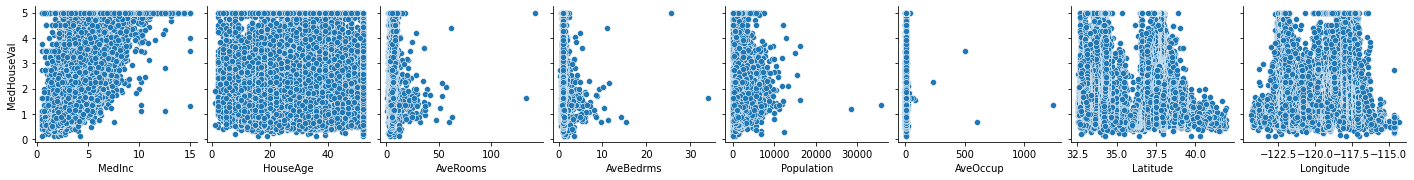

In [79]:
sns.pairplot(df, x_vars=['MedInc', 'HouseAge', 'AveRooms',  'AveBedrms',
       'Population', 'AveOccup', 'Latitude', 'Longitude'], y_vars='MedHouseVal')

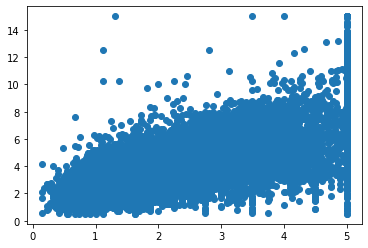

In [52]:
plt.scatter(df.MedHouseVal, df.MedInc)

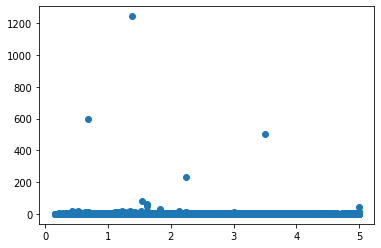

In [178]:
plt.scatter(df.MedHouseVal, df.AveOccup)

In [54]:
pd.Series([variance_inflation_factor(df.values, i) 
               for i in range(df.shape[1])], 
              index=df.columns)

MedInc          19.624998
HouseAge         7.592663
AveRooms        47.956351
AveBedrms       45.358192
Population       2.936078
AveOccup         1.099530
Latitude       568.497332
Longitude      640.064211
MedHouseVal      9.285659
dtype: float64

In [187]:
df.drop(columns=['Longitude', inplace=True)

SyntaxError: ignored

In [182]:
pd.Series([variance_inflation_factor(df.values, i) 
               for i in range(df.shape[1])], 
              index=df.columns)

MedInc         18.639889
HouseAge        7.346583
AveRooms       44.714760
AveBedrms      42.072000
Population      2.796280
AveOccup        1.099394
Latitude       22.873934
MedHouseVal     9.193500
dtype: float64

In [184]:
df.drop(columns=['AveRooms'], inplace=True)

In [189]:
df.drop(columns=['Latitude'], inplace=True)

In [190]:
pd.Series([variance_inflation_factor(df.values, i) 
               for i in range(df.shape[1])], 
              index=df.columns)

MedInc         8.855104
HouseAge       4.156145
AveBedrms      4.264253
Population     2.223926
AveOccup       1.098671
MedHouseVal    8.607339
dtype: float64

In [55]:
lin_reg = LinearRegression(fit_intercept=True)

In [56]:
y = df.MedHouseVal.to_numpy()
X = df.MedInc.to_numpy()

In [57]:
y

array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894])

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=22)

In [192]:
X_train = X_train.reshape(-1, 1)
X_test = X_test.reshape(-1, 1)

In [193]:
reg = sm.OLS(y_train, X_train).fit()
print(reg.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.866
Model:                            OLS   Adj. R-squared (uncentered):              0.866
Method:                 Least Squares   F-statistic:                          9.300e+04
Date:                Wed, 01 Dec 2021   Prob (F-statistic):                        0.00
Time:                        19:17:28   Log-Likelihood:                         -18506.
No. Observations:               14447   AIC:                                  3.701e+04
Df Residuals:                   14446   BIC:                                  3.702e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [194]:
lin_reg.fit(X_train, y_train)

LinearRegression()

In [195]:
lin_reg.coef_

array([0.41844705])

In [196]:
lin_reg.intercept_

0.4522226496890027

In [64]:
y_hat_train = lin_reg.predict(X_train)

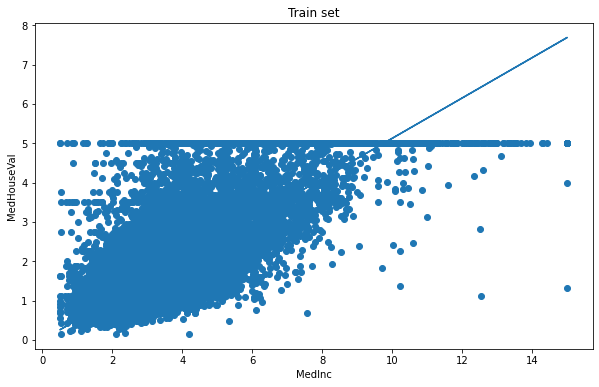

In [197]:
plt.figure(figsize=(10, 6))
plt.scatter(X_train, y_train)
plt.xlabel('MedInc')
plt.ylabel('MedHouseVal')
plt.title('Train set')
plt.plot(X_train, y_hat_train)

In [198]:
y_hat_test = lin_reg.predict(X_test)

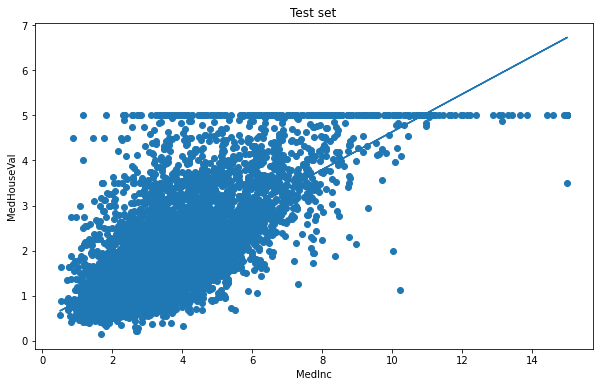

In [199]:
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test)
plt.xlabel('MedInc')
plt.ylabel('MedHouseVal')
plt.title('Test set')
plt.plot(X_test, y_hat_test)

In [200]:
y_hat_train = reg.predict(X_train)

In [201]:
resid = y_hat_train-y_train.squeeze()

Кога използваме хистограма и кога колонна
диаграмa (bar chart)?

Хистограмата се използва за показване на графично представяне, под формата на честота; а колонната диаграма представя данните и информацията, като се използва за сравнение на категории.

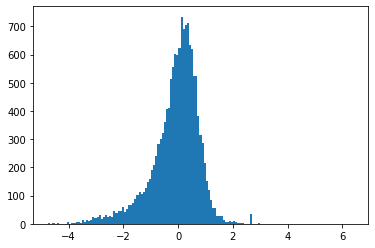

In [202]:
plt.hist(resid, bins='fd')
plt.show()

Коефициент на детерминация  = измерва каква част от грешката при прогнозата е елиминирана. Диапазона и е между 0 и 1. При полученият в момента резултат модела се определя като среден.

In [203]:
lin_reg.score(X_train, y_train)

0.46995381013288307

MSE - средноквадратична грешка

In [204]:
mean_squared_error(y_hat_train, y_train)

0.7588349778616446

In [205]:
mean_squared_error(y_hat_test, y_test)

0.6599185649568535